# **Data Science - Youtube Subscribers prediction**

**Name: Brian Sch**

---

# **Summery of Youtube features**




* **rank:** A numeric feature that represents the position of the YouTube channel based on the number of subscribers.
* **Youtuber:** An alphanumeric feature that represents the name of the YouTube channel.
* **subscribers:** A numeric feature that represents the number of subscribers to the channel.
* **video views:** A numeric feature that represents the total views across all videos on the channel.
* **category:** An alphanumeric feature that represents the category or niche of the channel.
* **Title:** An alphanumeric feature that represents the title of the YouTube channel.
* **uploads:** A numeric feature that represents the total number of videos uploaded on the channel.
* **Country:** An alphanumeric feature that represents the country where the YouTube channel originates.
* **Abbreviation:** An alphanumeric feature that represents the abbreviation of the country.
* **channel_type:** An alphanumeric feature that represents the type of the YouTube channel (e.g., individual, brand).
* **video_views_rank:** A numeric feature that represents the ranking of the channel based on total video views.
* **country_rank:** A numeric feature that represents the ranking of the channel based on the number of subscribers within its country.
* **channel_type_rank:** A numeric feature that represents the ranking of the channel based on its type (individual or brand).
* **video_views_for_the_last_30_days:** A numeric feature that represents the total video views in the last 30 days.
* **lowest_monthly_earnings:** A numeric feature that represents the lowest estimated monthly earnings from the channel.
* **highest_monthly_earnings:** A numeric feature that represents the highest estimated monthly earnings from the channel.
* **lowest_yearly_earnings:** A numeric feature that represents the lowest estimated yearly earnings from the channel.
* **highest_yearly_earnings:** A numeric feature that represents the highest estimated yearly earnings from the channel.
* **subscribers_for_last_30_days:** A numeric feature that represents the number of new subscribers gained in the last 30 days.
* **created_year:** A numeric feature that represents the year when the YouTube channel was created.
* **created_month:** An alphanumeric feature that represents the month when the YouTube channel was created.
* **created_date:** A date feature that represents the exact date of the YouTube channel's creation.
* **Gross tertiary education enrollment (%):** A numeric feature that represents the percentage of the population enrolled in tertiary education in the country.
* **Population:** A numeric feature that represents the total population of the country.
* **num_of_videos:** A numeric feature that represents the number of uploaded videos on the channel.
* **Unemployment rate:** A numeric feature that represents the unemployment rate in the country.
* **Urban_population:** A numeric feature that represents the percentage of the population living in urban areas.
* **Latitude:** A numeric feature that represents the latitude coordinate of the country's location.
* **Longitude:** A numeric feature that represents the longitude coordinate of the country's location.



# **Import libraries and read csv file:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
%matplotlib inline

df = pd.read_csv('/content/youtube_subscribers.csv')
df1=df
data = df.drop('subscribers',axis=1)
target_label = df['subscribers']



# **Encoding alphanumeric features**

**The alphanumeric features in the list are:**

* Youtuber
* Category
* Title
* Country
* Abbreviation
* Channel type
* Month Created

Label encoding is a technique for converting categorical data into numerical data by assigning each category a unique integer value. This is a good choice for features where the order of the categories matters, such as the Channel_type feature. For example, a channel that is classified as "individual" is considered to be less important than a channel that is classified as "brand".

One hot encoding is a technique for converting categorical data into a set of binary features, where each feature represents the presence or absence of a particular category. This is a good choice for features where the order of the categories does not matter, such as the Country feature. For example, a channel that is located in the United States is not considered to be more important than a channel that is located in the United Kingdom.

Here is how I would encode the alphanumeric features in your list using label encoding and one hot encoding:

* **Youtuber**: *Label* encoding. This is because the order of the YouTubers does matter.
* **Category**: *One hot* encoding. This is because the order of the categories does not matter.
* **Title**: *Label* encoding. This is because the order of the titles does matter.
* **Country**: *One hot* encoding. This is because the order of the countries does not matter.
* **Abbreviation**: *Label* encoding. This is because the order of the abbreviations does matter.
* **Channeltype**: *Label* encoding. This is because the order of the channel types does matter.
* **Month Created**: *Label* encoding. This is because the order of the channel types does matter.

In [ ]:
# list of features
alpha_numeric_list = ["channel_type","Youtuber", "Title", "Abbreviation", "created_month", "category", "Country"]
# Create a label encoder
le = LabelEncoder()

# Fit the encoder to the categorical features
for column in alpha_numeric_list:
    if column in df.columns:
      le.fit(df[column])
      df[column] = le.transform(df[column])
label_encoded=df
label_encoded.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,num_of_videos,Unemployment rate,Urban_population,Latitude,Longitude
0,1,737,245000000,2.280000e+11,8,703,20082,18,22,8,...,2006.0,7,13.0,28.1,1.366418e+09,20082,5.36,471031528.0,20.593684,78.962880
1,2,890,170000000,0.000000e+00,4,953,1,46,45,6,...,2006.0,7,5.0,88.2,3.282395e+08,1,14.70,270663028.0,37.090240,-95.712891
2,3,545,166000000,2.836884e+10,3,521,741,46,45,4,...,2012.0,3,20.0,88.2,3.282395e+08,741,14.70,270663028.0,37.090240,-95.712891
3,4,154,162000000,1.640000e+11,2,147,966,46,45,3,...,2006.0,11,1.0,88.2,3.282395e+08,966,14.70,270663028.0,37.090240,-95.712891
4,5,671,159000000,1.480000e+11,14,640,116536,18,22,4,...,2006.0,11,20.0,28.1,1.366418e+09,116536,5.36,471031528.0,20.593684,78.962880


In [ ]:

# One hot encode the features
one_hot_encoded = df1.copy()
for feature in alpha_numeric_list:
   one_hot_encoded = pd.get_dummies(one_hot_encoded, columns=[feature])


print("One Hot Encoded DataFrame:")
one_hot_encoded.head()




One Hot Encoded DataFrame:


,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,Country_40,Country_41,Country_42,Country_43,Country_44,Country_45,Country_46,Country_47,Country_48,Country_49
0,1,245000000,2.280000e+11,20082,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.00,...,0,0,0,0,0,0,0,0,0,0
1,2,170000000,0.000000e+00,1,4055159.0,7670.0,7423.0,1.200000e+01,0.0,0.05,...,0,0,0,0,0,0,1,0,0,0
2,3,166000000,2.836884e+10,741,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.00,...,0,0,0,0,0,0,1,0,0,0
3,4,162000000,1.640000e+11,966,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.00,...,0,0,0,0,0,0,1,0,0,0
4,5,159000000,1.480000e+11,116536,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.00,...,0,0,0,0,0,0,0,0,0,0


# **Plot the features**

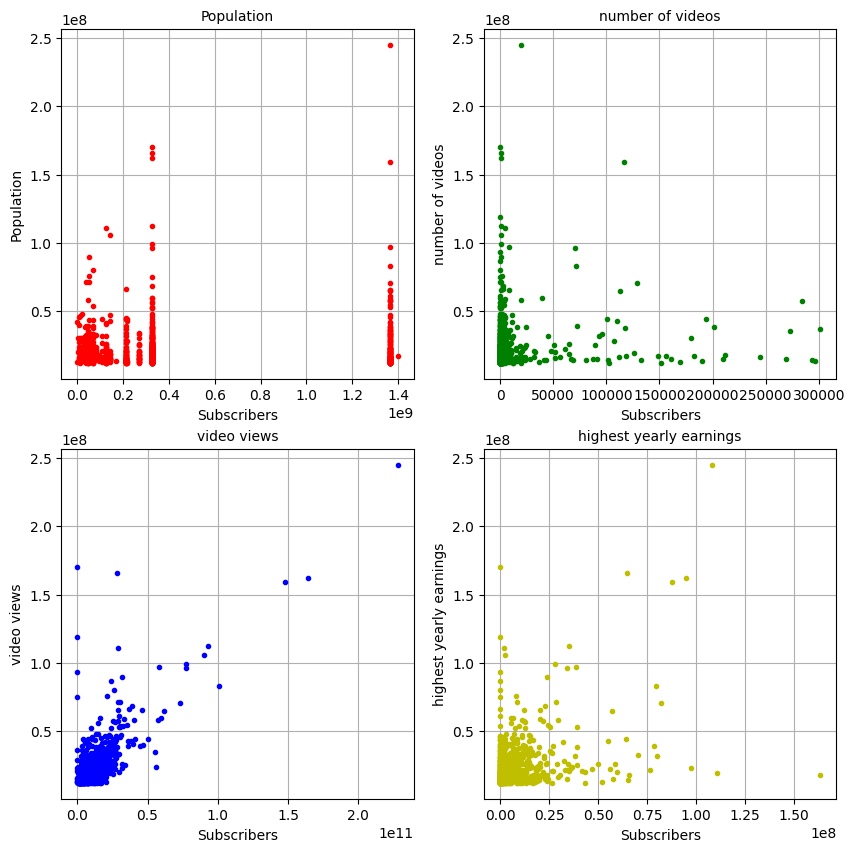

In [ ]:

# Plot the distribution of values for each feature
X_set = label_encoded[['video views', 'num_of_videos', 'Population', 'highest_yearly_earnings']]
y_set = target_label
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.plot(X_set['Population'], y_set, 'ro', markersize=3)
plt.title('Population',fontsize=10)
plt.ylabel('Population')
plt.xlabel('Subscribers')
plt.grid()


plt.subplot(222)
plt.plot(X_set['num_of_videos'], y_set,'go',markersize=3)
plt.title('number of videos',fontsize=10)
plt.ylabel('number of videos')
plt.xlabel('Subscribers')
plt.grid()


plt.subplot(223)
plt.plot(X_set['video views'],y_set,'bo',markersize=3)
plt.title('video views',fontsize=10)
plt.ylabel('video views')
plt.xlabel('Subscribers')
plt.grid()


plt.subplot(224)
plt.plot(X_set['highest_yearly_earnings'],y_set, 'yo',markersize=3)
plt.title('highest yearly earnings',fontsize=10)
plt.ylabel('highest yearly earnings')
plt.xlabel('Subscribers')
plt.grid()

* Population graph - The graph doesnt show us any sign of correlation between the population of the channel country and his subscribers

* number of videos - Surprisingly enough the graph shows us that the number of videos a channel uploads doesnt mean more subscribers on the contrary, we see that the channels with the highest subscribers have the lower number of videos

* Video views - Theres a linear correlation, the more video views a channel has the more probable that people subscribe

* yearly earnings - We can see theres also a linear correlation here, more yearly earnings more subscribers the channel has

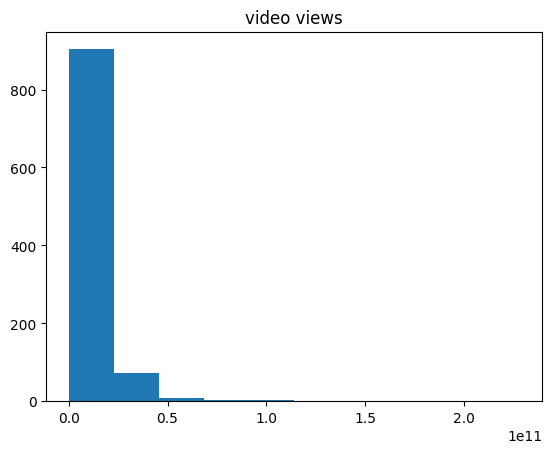

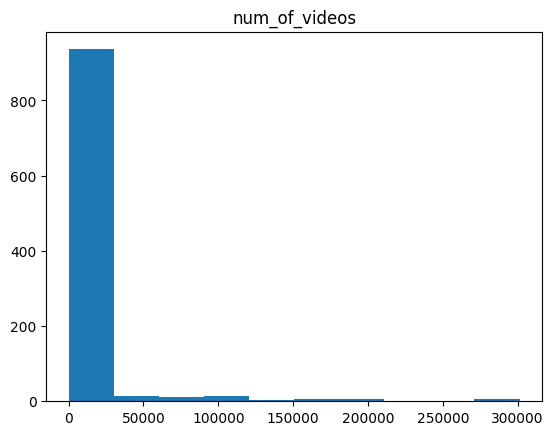

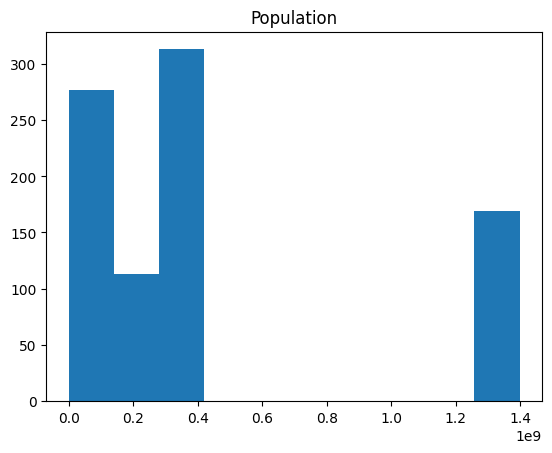

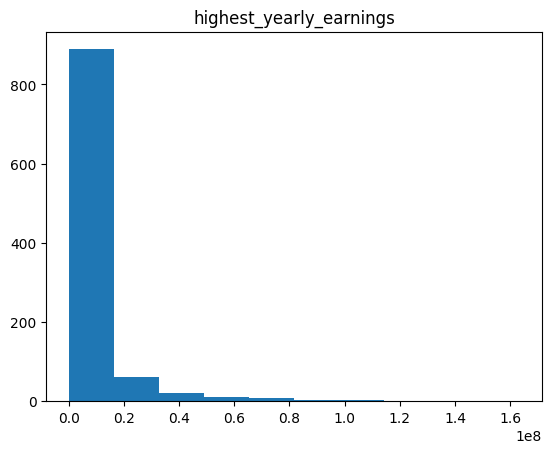

In [ ]:
for feature in ['video views', 'num_of_videos', 'Population', 'highest_yearly_earnings']:
    plt.hist(label_encoded[feature])
    plt.title(feature)
    plt.show()


# **Fill missing values:**

**Check for missing values and their precentage**

In [ ]:
# Check for missing values
missing_values = label_encoded.isna().sum()

# Print the percentage of missing values for each feature
for feature in label_encoded.columns:
    missing_precentage = (missing_values[feature] / len(label_encoded)) * 100
    print(feature,'=', "%.2f" % missing_precentage , '%')

rank = 0.00 %
Youtuber = 0.00 %
subscribers = 0.00 %
video views = 0.00 %
category = 0.00 %
Title = 0.00 %
uploads = 0.00 %
Country = 0.00 %
Abbreviation = 0.00 %
channel_type = 0.00 %
video_views_rank = 0.10 %
country_rank = 11.66 %
channel_type_rank = 3.32 %
video_views_for_the_last_30_days = 5.63 %
lowest_monthly_earnings = 0.00 %
highest_monthly_earnings = 0.00 %
lowest_yearly_earnings = 0.00 %
highest_yearly_earnings = 0.00 %
subscribers_for_last_30_days = 33.87 %
created_year = 0.50 %
created_month = 0.00 %
created_date = 0.50 %
Gross tertiary education enrollment (%) = 12.36 %
Population = 12.36 %
num_of_videos = 0.00 %
Unemployment rate = 12.36 %
Urban_population = 12.36 %
Latitude = 12.36 %
Longitude = 12.36 %


**Fill the mising values**

In [ ]:
# List of columns to consider
columns_to_fill = label_encoded.columns[label_encoded.isna().any()]

for column in columns_to_fill:

  if column in alpha_numeric_list:
    label_encoded[column].fillna(label_encoded[column].mode()[0],inplace=True)

  else:
    label_encoded[column].fillna(label_encoded[column].mean(),inplace=True)




**Check for missing valuesd again**

In [ ]:
# Check for missing values
missing_values = label_encoded.isna().sum()
missing_values.sort_values(ascending=True)

# Print the percentage of missing values for each feature
for feature in label_encoded.columns:
    missing_precentage = (missing_values[feature] / len(label_encoded)) * 100
    print(feature,'=', "%.2f" % missing_precentage , '%')

rank = 0.00 %
Youtuber = 0.00 %
subscribers = 0.00 %
video views = 0.00 %
category = 0.00 %
Title = 0.00 %
uploads = 0.00 %
Country = 0.00 %
Abbreviation = 0.00 %
channel_type = 0.00 %
video_views_rank = 0.00 %
country_rank = 0.00 %
channel_type_rank = 0.00 %
video_views_for_the_last_30_days = 0.00 %
lowest_monthly_earnings = 0.00 %
highest_monthly_earnings = 0.00 %
lowest_yearly_earnings = 0.00 %
highest_yearly_earnings = 0.00 %
subscribers_for_last_30_days = 0.00 %
created_year = 0.00 %
created_month = 0.00 %
created_date = 0.00 %
Gross tertiary education enrollment (%) = 0.00 %
Population = 0.00 %
num_of_videos = 0.00 %
Unemployment rate = 0.00 %
Urban_population = 0.00 %
Latitude = 0.00 %
Longitude = 0.00 %


# **Correlation matrix**

<Axes: >

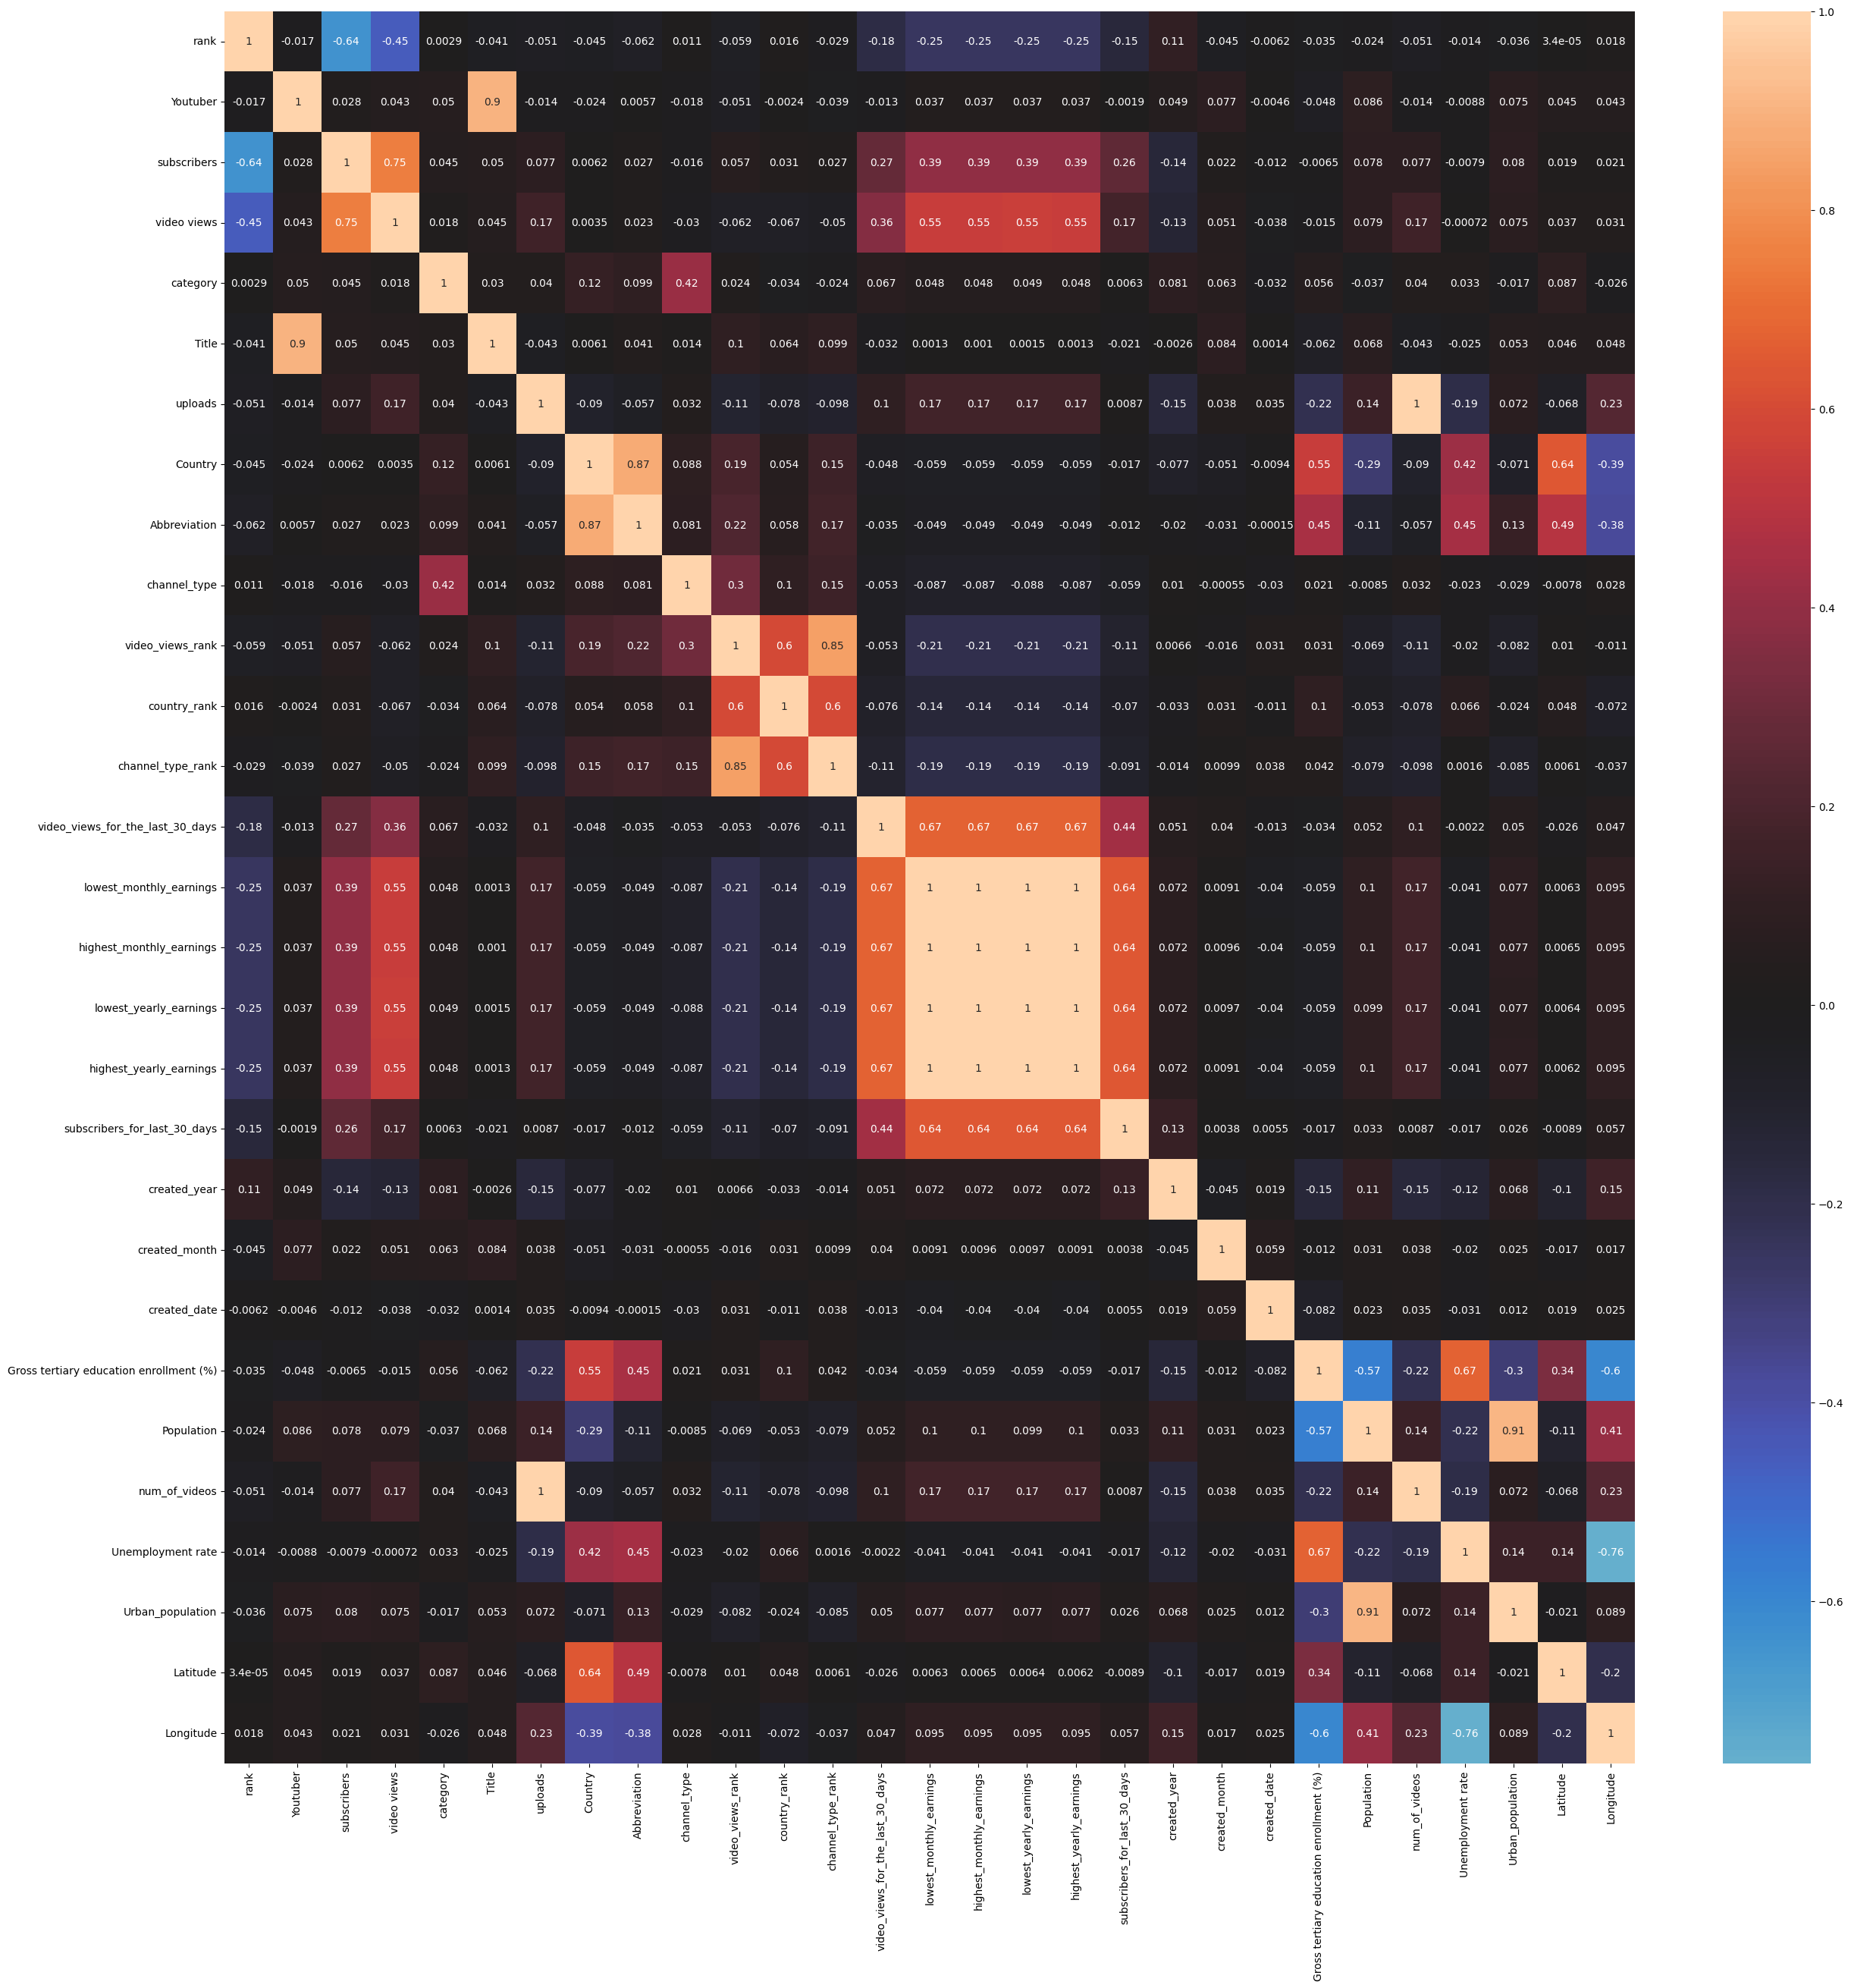

In [ ]:
# Plot the correlation matrix
plt.figure(figsize=(30,30))
sns.heatmap(label_encoded.corr(),center=0, annot=True)


In [ ]:
# Get the correlations with the target label
corr_mat = df.corr()
target_label = "subscribers"
correlations_with_target = corr_mat[target_label]

# Sort the correlations in descending order
sorted_correlations = correlations_with_target.sort_values(ascending=False)

# Print the labels with the highest correlations to the target label
print("Labels with the highest correlation to the target label:")
for label, correlation in sorted_correlations.items():
    if label != target_label:
        print(f"{label}: {correlation:.2f}")

Labels with the highest correlation to the target label:
video views: 0.75
lowest_yearly_earnings: 0.39
lowest_monthly_earnings: 0.39
highest_yearly_earnings: 0.39
highest_monthly_earnings: 0.39
video_views_for_the_last_30_days: 0.27
subscribers_for_last_30_days: 0.26
Urban_population: 0.08
Population: 0.08
num_of_videos: 0.08
uploads: 0.08
video_views_rank: 0.06
Title: 0.05
category: 0.05
country_rank: 0.03
Youtuber: 0.03
Abbreviation: 0.03
channel_type_rank: 0.03
created_month: 0.02
Longitude: 0.02
Latitude: 0.02
Country: 0.01
Gross tertiary education enrollment (%): -0.01
Unemployment rate: -0.01
created_date: -0.01
channel_type: -0.02
created_year: -0.14
rank: -0.64


From the results of the correlation list we can assume that under the score of
 ~+-0.3 the data isn't relevant and has no correlation with the subscribers.

Therefore only the labes:
* video views: 0.75
* lowest_yearly_earnings: 0.39
* lowest_monthly_earnings: 0.39
* highest_yearly_earnings: 0.39
* highest_monthly_earnings: 0.39
* subscribers_for_last_30_days: 0.31
* video_views_for_the_last_30_days: 0.28
* rank: -0.64 * it doesnt make sense that it has negative correlation, meaning the more ranked the channel the less subscribers it has or the opposite

are relevant and have correlation to the target label

# **Clean unessecary labels**

**Unique alphanumeric labels**

In [ ]:
#Checking for unique values in alphanumeric features

for col in label_encoded.columns:
    print(col,' has ',label_encoded[col].unique().shape[0], ' unique values')

rank  has  995  unique values
Youtuber  has  995  unique values
subscribers  has  289  unique values
video views  has  988  unique values
category  has  19  unique values
Title  has  992  unique values
uploads  has  777  unique values
Country  has  50  unique values
Abbreviation  has  50  unique values
channel_type  has  15  unique values
video_views_rank  has  954  unique values
country_rank  has  247  unique values
channel_type_rank  has  287  unique values
video_views_for_the_last_30_days  has  909  unique values
lowest_monthly_earnings  has  557  unique values
highest_monthly_earnings  has  736  unique values
lowest_yearly_earnings  has  757  unique values
highest_yearly_earnings  has  419  unique values
subscribers_for_last_30_days  has  54  unique values
created_year  has  20  unique values
created_month  has  13  unique values
created_date  has  32  unique values
Gross tertiary education enrollment (%)  has  48  unique values
Population  has  49  unique values
num_of_videos  has

We can see the youtuber name and title probably dont affect the number of subscribers. it is irrelevant data to use.

Furthermore 'Country' and 'Abbreviation' is basically the same so we can drop one of them.

In [ ]:
label_encoded.drop(['Title','Youtuber','Abbreviation'],axis=1,inplace=True)
label_encoded.head()

,rank,subscribers,video views,category,uploads,Country,channel_type,video_views_rank,country_rank,channel_type_rank,...,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,num_of_videos,Unemployment rate,Urban_population,Latitude,Longitude
0,1,245000000,2.280000e+11,8,20082,18,8,1.0,1.0,1.0,...,2006.0,7,13.0,28.1,1.366418e+09,20082,5.36,471031528.0,20.593684,78.962880
1,2,170000000,0.000000e+00,4,1,46,6,4055159.0,7670.0,7423.0,...,2006.0,7,5.0,88.2,3.282395e+08,1,14.70,270663028.0,37.090240,-95.712891
2,3,166000000,2.836884e+10,3,741,46,4,48.0,1.0,1.0,...,2012.0,3,20.0,88.2,3.282395e+08,741,14.70,270663028.0,37.090240,-95.712891
3,4,162000000,1.640000e+11,2,966,46,3,2.0,2.0,1.0,...,2006.0,11,1.0,88.2,3.282395e+08,966,14.70,270663028.0,37.090240,-95.712891
4,5,159000000,1.480000e+11,14,116536,18,4,3.0,2.0,2.0,...,2006.0,11,20.0,28.1,1.366418e+09,116536,5.36,471031528.0,20.593684,78.962880


**Now we will clean the data and drop the uninteresting columns with no correlation**



In [ ]:
for label, correlation in sorted_correlations.items():
    if label != target_label and abs(correlation) < 0.25 and label in label_encoded.columns:
      label_encoded.drop(label,axis=1,inplace=True)

print(label_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rank                              995 non-null    int64  
 1   subscribers                       995 non-null    int64  
 2   video views                       995 non-null    float64
 3   video_views_for_the_last_30_days  995 non-null    float64
 4   lowest_monthly_earnings           995 non-null    float64
 5   highest_monthly_earnings          995 non-null    float64
 6   lowest_yearly_earnings            995 non-null    float64
 7   highest_yearly_earnings           995 non-null    float64
 8   subscribers_for_last_30_days      995 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 70.1 KB
None


In [ ]:
label_encoded.head()

,rank,subscribers,video views,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days
0,1,245000000,2.280000e+11,2.258000e+09,564600.0,9000000.00,6800000.00,1.084000e+08,2.000000e+06
1,2,170000000,0.000000e+00,1.200000e+01,0.0,0.05,0.04,5.800000e-01,3.490791e+05
2,3,166000000,2.836884e+10,1.348000e+09,337000.0,5400000.00,4000000.00,6.470000e+07,8.000000e+06
3,4,162000000,1.640000e+11,1.975000e+09,493800.0,7900000.00,5900000.00,9.480000e+07,1.000000e+06
4,5,159000000,1.480000e+11,1.824000e+09,455900.0,7300000.00,5500000.00,8.750000e+07,1.000000e+06


# **Module Sets**

In [ ]:
# Split the data into features and target
y = label_encoded['subscribers']
x = label_encoded.copy()
x.drop('subscribers',axis=1,inplace=True)

# Split the data into train, validation, and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state = 1)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = 0.5,random_state = 1)

# Print the sets
print(f'x_train: {x_train.shape}')
print(f'x_val: {x_val.shape}')
print(f'x_test: {x_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_val: {y_val.shape}')
print(f'y_test: {y_test.shape}')

print(x_train.info())
print(y_train.info())


x_train: (696, 8)
x_val: (149, 8)
x_test: (150, 8)
y_train: (696,)
y_val: (149,)
y_test: (150,)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 696 entries, 349 to 37
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rank                              696 non-null    int64  
 1   video views                       696 non-null    float64
 2   video_views_for_the_last_30_days  696 non-null    float64
 3   lowest_monthly_earnings           696 non-null    float64
 4   highest_monthly_earnings          696 non-null    float64
 5   lowest_yearly_earnings            696 non-null    float64
 6   highest_yearly_earnings           696 non-null    float64
 7   subscribers_for_last_30_days      696 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 48.9 KB
None
<class 'pandas.core.series.Series'>
Int64Index: 696 entries, 349 to 37
Series name: subscribers
Non-Null Count  D

**Creating Scores Table**

In [ ]:
scores = pd.DataFrame(columns=['train accuracy','validation accuracy'],index=['tree','xgboost'])
print(scores)

        train accuracy validation accuracy
tree               NaN                 NaN
xgboost            NaN                 NaN


# **Decsision tree**

**Train the module**

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

scores.at['tree','train accuracy'] = tree.score(x_train, y_train)
scores.at['tree','validation accuracy'] = tree.score(x_val, y_val)
print(scores)


**Confusion matrix**

        train accuracy validation accuracy
tree               1.0            0.597315
forest             NaN                 NaN
xgboost            NaN                 NaN


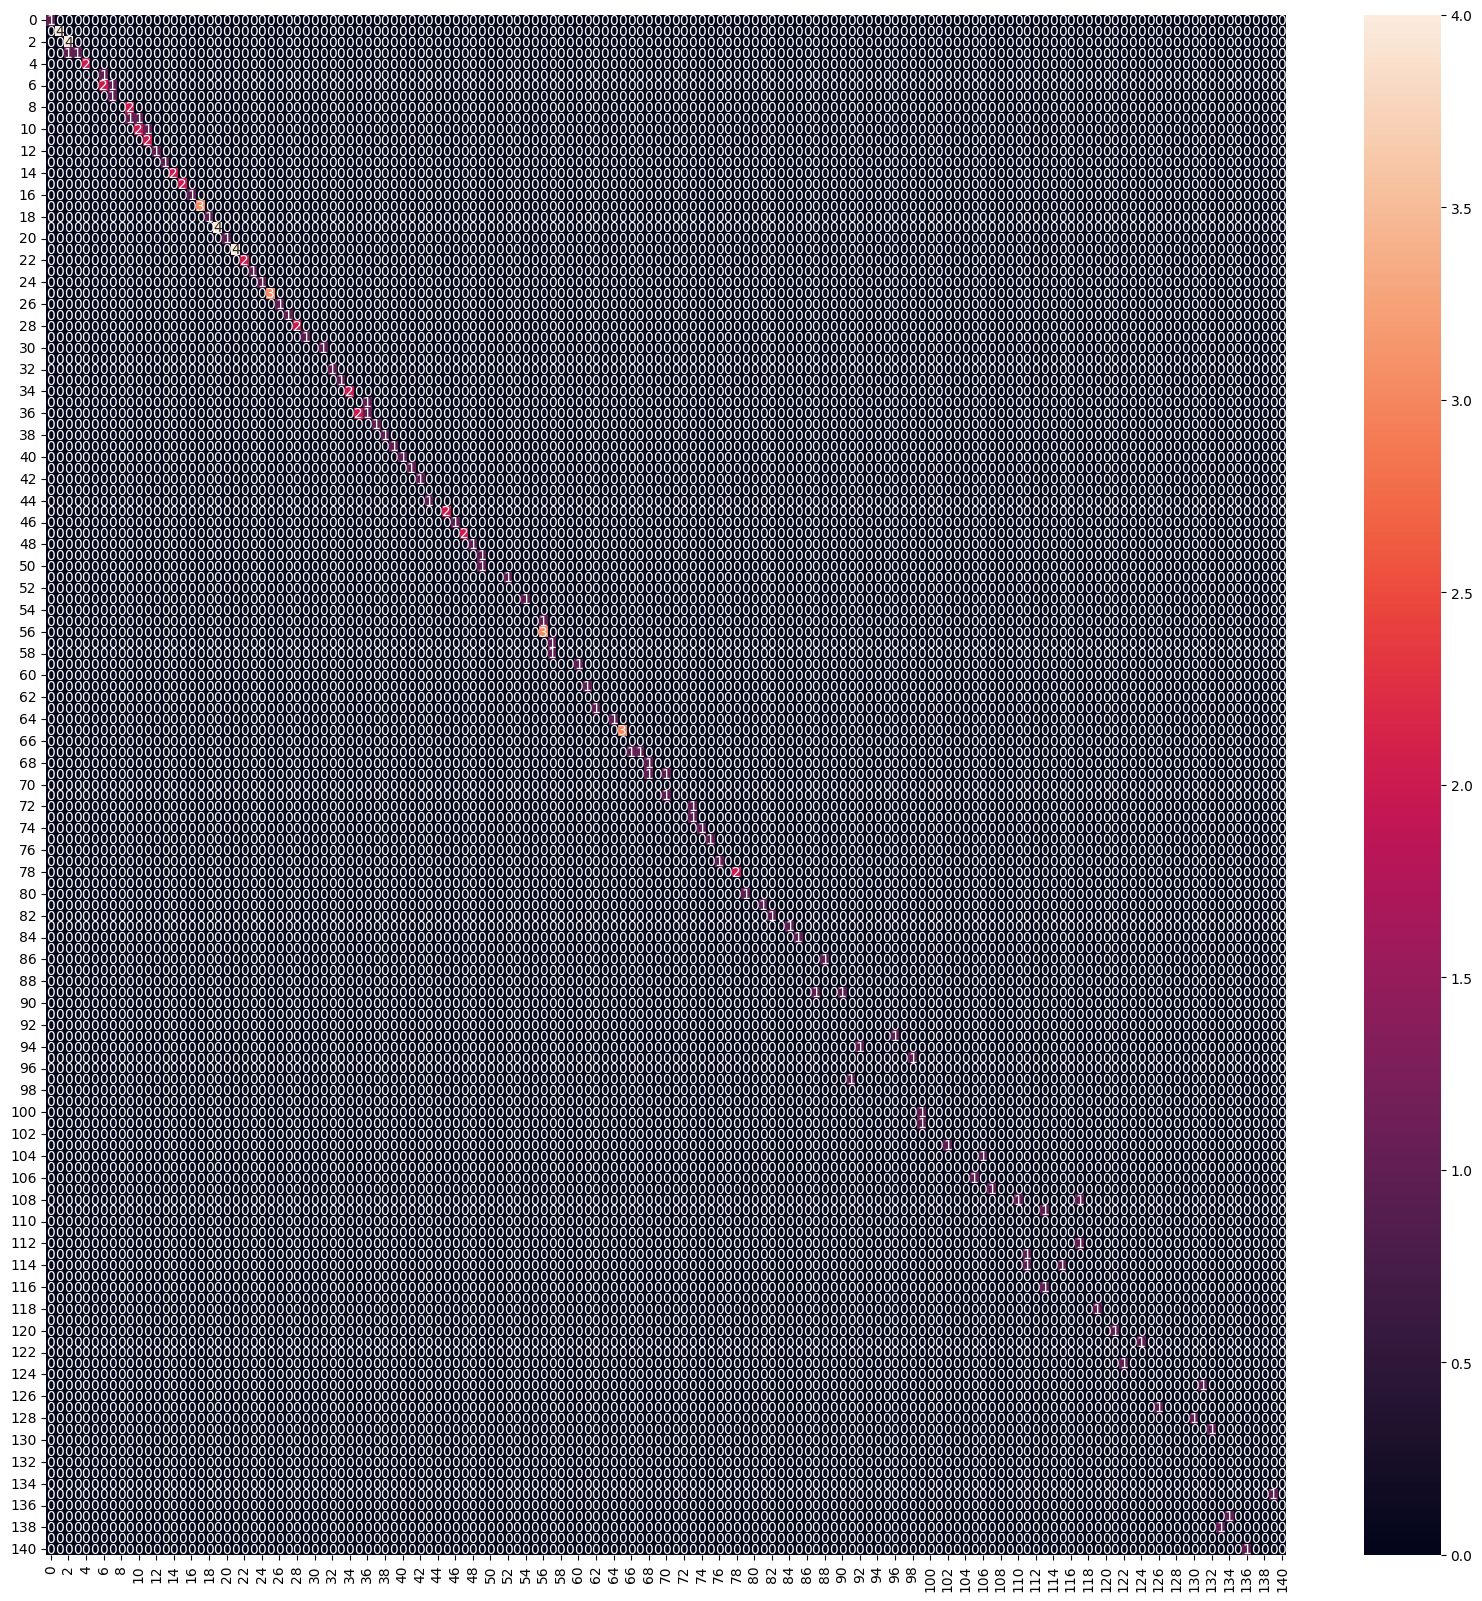

In [ ]:
plt.figure(figsize=(20,20))
conf = confusion_matrix(y_val, tree.predict(x_val))
sns.heatmap(conf, annot=True, fmt="d")

**Search for hyper parameters**

In [ ]:
# from tqdm import tqdm

best_params = None
best_tree = None
best_accuracy = None
for max_depth in tqdm(range(2,15)):
    for min_samples_split in range(2, 10):
        for min_samples_leaf in range(1, 10):
            for criterion in ('gini', 'entropy'):
                params = {'criterion': criterion, 'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf, 'min_samples_split': min_samples_split}
                tree = DecisionTreeClassifier(**params)
                tree.fit(x_train, y_train)
                accuracy = tree.score(x_val, y_val)
                if best_accuracy is None or accuracy > best_accuracy:
                    best_params = params
                    best_tree = tree
                    best_accuracy = accuracy

print(f'Best accuracy: {best_accuracy}')
print(f'Best params: {best_params}')


scores.at['tree_opt','train accuracy'] = best_tree.score(x_train, y_train)
scores.at['tree_opt','validation accuracy'] = best_tree.score(x_val, y_val)
print(scores)

100%|██████████| 13/13 [01:16<00:00,  5.91s/it]

Best accuracy: 0.6577181208053692
Best params: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2}


# **XGBoost**

**XGBoost model need the array of y_train to start at 0 so we first encode the target label, we train the model and then we decode the data to see results**

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

y_train = le.fit_transform(y_train)

XGB = XGBClassifier()
XGB.fit(x_train, y_train)

y_pred_train = XGB.predict(x_train)
y_pred_train = le.inverse_transform(y_pred_train)
train_predictions = [round(value) for value in y_pred_train]

y_pred_val = XGB.predict(x_val)
y_pred_val = le.inverse_transform(y_pred_val)
val_predictions = [round(value) for value in y_pred_val]

y_train = le.inverse_transform(y_train)

In [ ]:
scores.at['xgboost','train accuracy'] = accuracy_score(y_train, train_predictions)
scores.at['xgboost','validation accuracy'] = accuracy_score(y_val, val_predictions)
print(scores)

         train accuracy validation accuracy
tree                1.0            0.597315
forest              NaN                 NaN
xgboost        0.949713            0.630872
tree_opt       0.975575            0.657718


**Confusion matrix**

<Axes: >

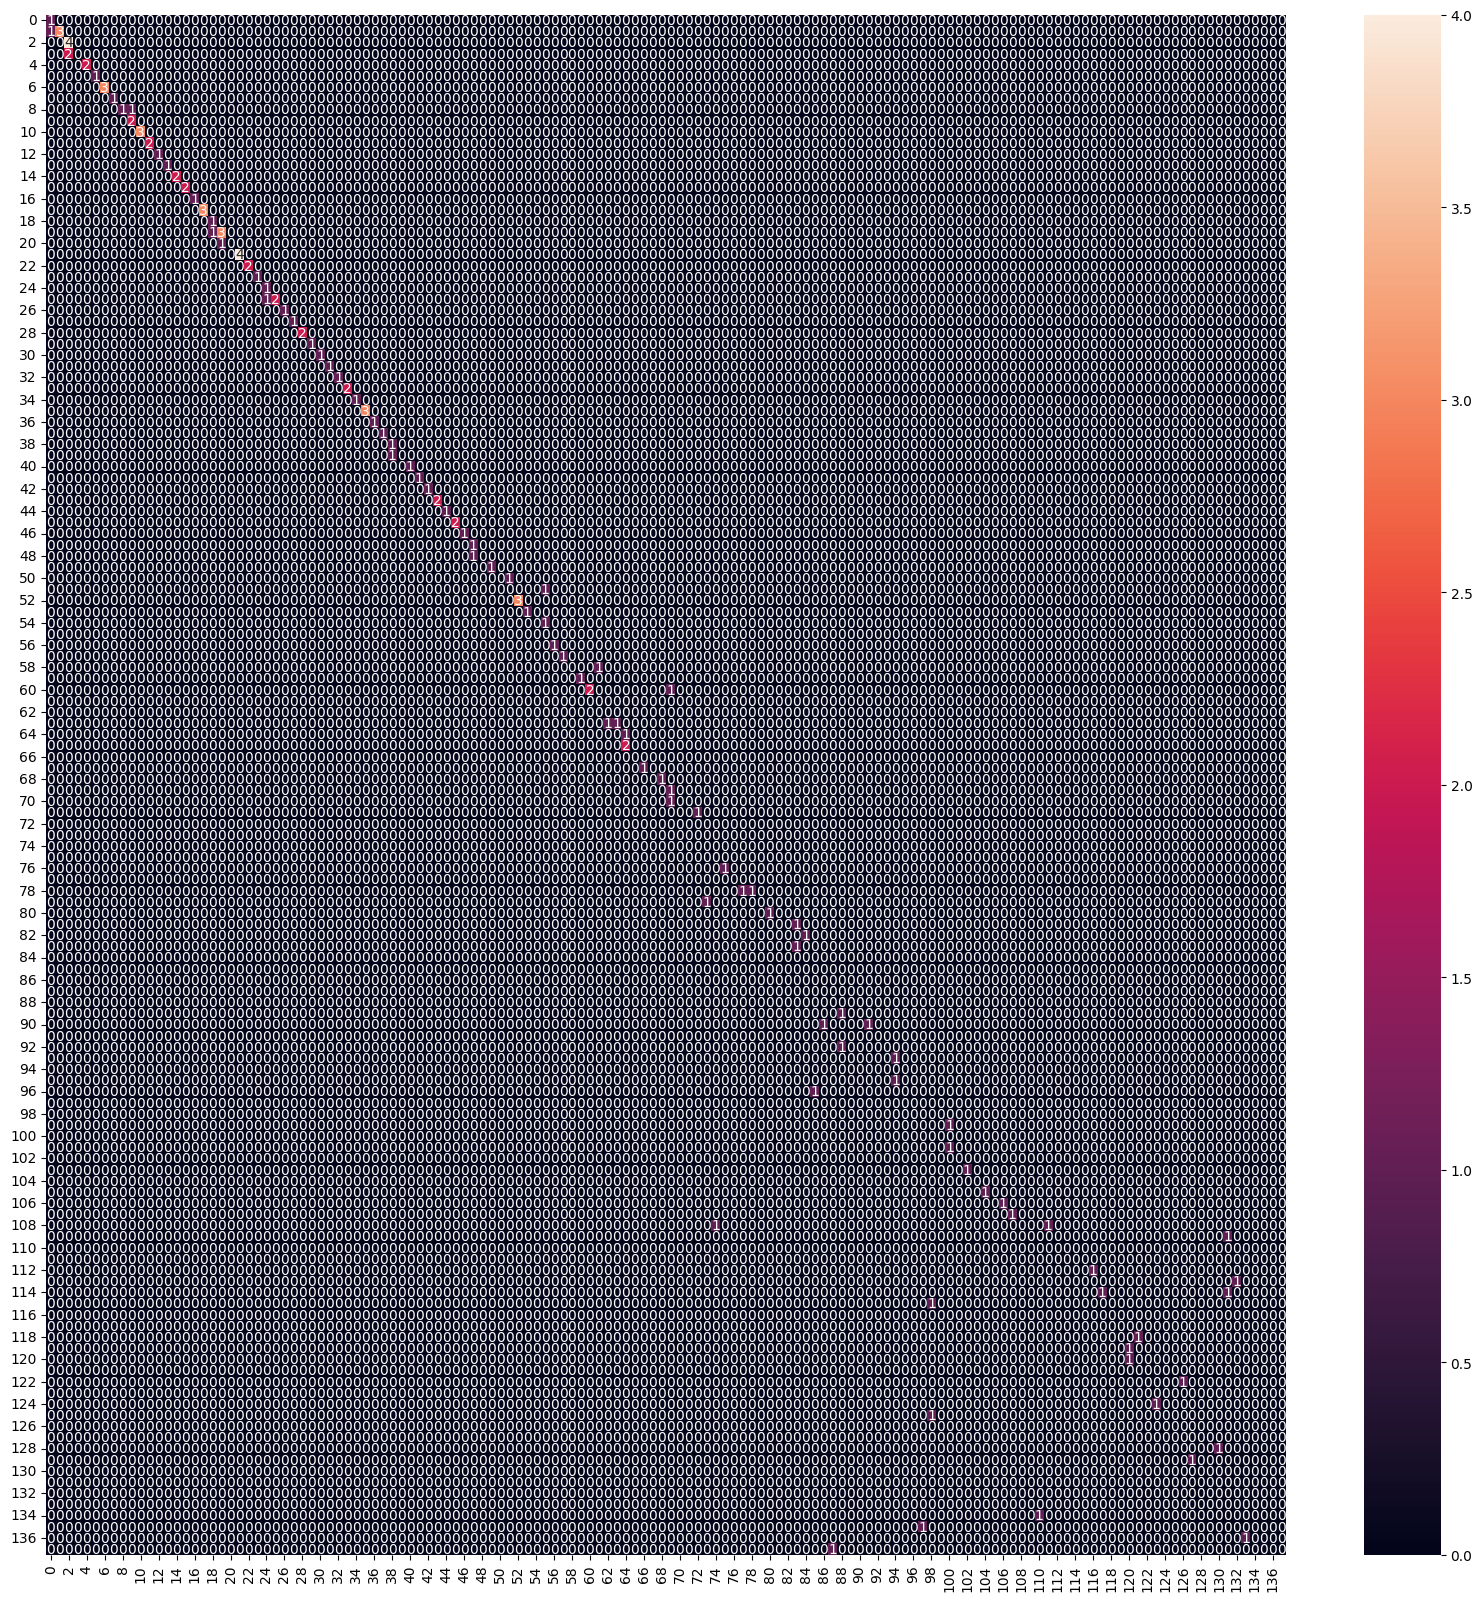

In [ ]:
plt.figure(figsize=(20,20))
conf = confusion_matrix(y_val, val_predictions)
sns.heatmap(conf, annot=True, fmt="d")

**XGBoost Hyper-params**

In [ ]:
best_params = None
best_tree = None
best_accuracy = None
y_train = le.fit_transform(y_train)

for max_depth in tqdm(range(2,15)):
    for num_est in [200,500,1000,1500]:
                params = {'max_depth': max_depth, 'n_estimators': num_est}
                xgb = XGBClassifier(**params)
                XGB.fit(x_train, y_train)
                y_pred_val = XGB.predict(x_val)
                y_pred_val = le.inverse_transform(y_pred_val)
                val_predictions = [round(value) for value in y_pred_val]
                accuracy = accuracy_score(y_val, val_predictions)
                if best_accuracy is None or accuracy > best_accuracy:
                    best_params = params
                    best_tree = tree
                    best_accuracy = accuracy

print(f'Best accuracy: {best_accuracy}')
print(f'Best params: {best_params}')


xgb = XGBClassifier(**best_params)
XGB.fit(x_train, y_train)


y_pred_train = XGB.predict(x_train)
y_pred_train = le.inverse_transform(y_pred_train)
train_predictions = [round(value) for value in y_pred_train]

y_pred_val = XGB.predict(x_val)
y_pred_val = le.inverse_transform(y_pred_val)
val_predictions = [round(value) for value in y_pred_val]

y_train = le.inverse_transform(y_train)
scores.at['xgboost_opt','train accuracy'] = accuracy_score(y_train, train_predictions)
scores.at['xgboost_opt','validation accuracy'] = accuracy_score(y_val, val_predictions)

100%|██████████| 13/13 [05:09<00:00, 23.84s/it]


Best accuracy: 0.6308724832214765
Best params: {'max_depth': 2, 'n_estimators': 200}


# **Scores**

In [1]:
scores

NameError: name 'scores' is not defined